# Geolocation (Customer Traffic)

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
### load the original customer count datasets which were derived from database
ua = pd.read_csv('ua.csv') # UA Geo from 2017-12-31
nike = pd.read_csv('nike.csv') # NKE Geo from 2017-12-31
NIKE_Tweet = pd.read_csv('NIKE_Tweet.csv') # from 2017-07 to 2018-07
UA_Tweet = pd.read_csv('UA_Tweet.csv') # from 2017-07 to 2018-07
alldata = pd.read_csv('alldata.csv') # from 2018-01-02
ua_nike = pd.read_csv('ua_nike_0.2_1.csv') # UA & NKE Geo

In [3]:
ua.head()

,Unnamed: 0,UTCtimestamp,advertisingID,deviceLatitude,deviceLongitude,id,latitude,longitude
0,0,1514767636186,772BA92E-F773-4EEB-9C56-48B64B833DCF,41.89330,-87.62446,19,41.89269,-87.62455
1,1,1514766265060,7415AAF3-6878-4177-BB71-58C8ABD1A94E,41.89205,-87.62421,19,41.89269,-87.62455
2,2,1514767647000,772BA92E-F773-4EEB-9C56-48B64B833DCF,41.89330,-87.62449,19,41.89269,-87.62455
3,3,1514771519003,7DC33D5D-7902-4AB7-AB59-E569A87A2FD7,36.05305,-115.16940,33,36.05271,-115.16950
4,4,1514771522614,7DC33D5D-7902-4AB7-AB59-E569A87A2FD7,36.05305,-115.16940,33,36.05271,-115.16950


In [4]:
ua.drop(['Unnamed: 0', 'latitude', 'longitude'], axis = 1, inplace = True)
nike.drop(['Unnamed: 0', 'latitude', 'longitude'], axis = 1, inplace = True)

In [5]:
print(ua.shape)
print(nike.shape)

(2873531, 5)
(2214794, 5)


In [6]:
NIKE_Tweet.head()

,Date,Lst Trd/Lst Px,Volume,Twttr Sent,Twttr Sent(Real time),Twttr Pub Cnt,Twttr Neut Sent
0,7/11/18 19:30:00,NaN,NaN,NaN,NaN,5.0,4.0
1,7/11/18 19:00:00,77.50,200,77.50,NaN,8.0,8.0
2,7/11/18 18:30:00,77.36,68208,77.36,NaN,2.0,2.0
3,7/11/18 18:00:00,NaN,NaN,NaN,NaN,1.0,1.0
4,7/11/18 17:30:00,NaN,NaN,NaN,NaN,1.0,1.0


In [7]:
NIKE_Tweet.tail()

,Date,Lst Trd/Lst Px,Volume,Twttr Sent,Twttr Sent(Real time),Twttr Pub Cnt,Twttr Neut Sent
7355,7/31/17 9:30,58.66,461.514k,58.66,0.1068,2.0,NaN
7356,7/31/17 9:00,NaN,NaN,NaN,NaN,1.0,1.0
7357,7/31/17 7:30,NaN,NaN,NaN,NaN,1.0,NaN
7358,7/31/17 7:00,NaN,NaN,NaN,NaN,1.0,1.0
7359,7/31/17 5:30,NaN,NaN,NaN,NaN,3.0,3.0


In [8]:
print(NIKE_Tweet.shape)
print(UA_Tweet.shape)

(7360, 7)
(7061, 7)


In [9]:
### generate UA 30-min data
ua['time'] = pd.DatetimeIndex(pd.to_datetime(ua['UTCtimestamp'], unit='ms')).tz_localize('UTC')
ua = ua.set_index('time')
ua['ua_count'] = 1
ua.index = ua.index.tz_convert('America/New_York')
ua.index = ua.index.tz_localize(None)
ua.head()

,UTCtimestamp,advertisingID,deviceLatitude,deviceLongitude,id,ua_count
time,,,,,,
2017-12-31 19:47:16.186,1514767636186,772BA92E-F773-4EEB-9C56-48B64B833DCF,41.89330,-87.62446,19,1
2017-12-31 19:24:25.060,1514766265060,7415AAF3-6878-4177-BB71-58C8ABD1A94E,41.89205,-87.62421,19,1
2017-12-31 19:47:27.000,1514767647000,772BA92E-F773-4EEB-9C56-48B64B833DCF,41.89330,-87.62449,19,1
2017-12-31 20:51:59.003,1514771519003,7DC33D5D-7902-4AB7-AB59-E569A87A2FD7,36.05305,-115.16940,33,1
2017-12-31 20:52:02.614,1514771522614,7DC33D5D-7902-4AB7-AB59-E569A87A2FD7,36.05305,-115.16940,33,1


In [10]:
### data range from 01/01/2018 to 06/17/2018
ua=ua['2018-01-01':'2018-06-17']
ua.shape

(2870757, 6)

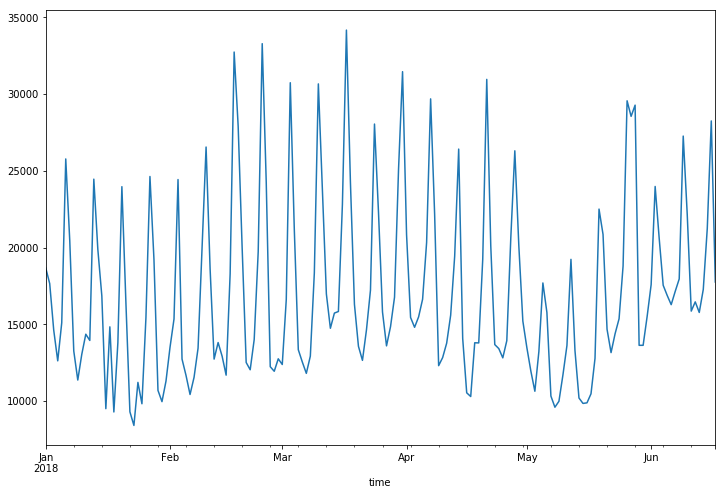

In [11]:
### UA daily data plot
ua['ua_count'].resample('D').sum().plot(figsize=(12,8))

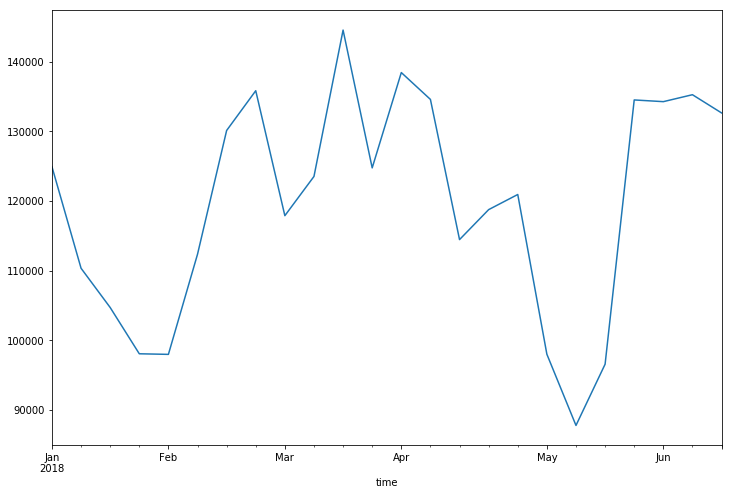

In [12]:
### UA weekly data plot
ua['ua_count'].resample('W').sum().plot(figsize=(12,8))

In [13]:
### generate NIKE 30-min data
nike['time'] = pd.DatetimeIndex(pd.to_datetime(nike['UTCtimestamp'], unit='ms')).tz_localize('UTC')
nike = nike.drop(['latitude', 'longitude'], axis=1)
nike = nike.set_index('time')
nike['nike_count'] = 1
nike.index = nike.index.tz_convert('America/New_York')
nike.index = nike.index.tz_localize(None)
nike.head()

,UTCtimestamp,advertisingID,deviceLatitude,deviceLongitude,id,nike_count
time,,,,,,
2017-12-31 19:46:51.000,1514767611000,7C0723F2-6927-41DE-9322-3C65AAD7B30A,32.96436,-97.04410,45,1
2017-12-31 18:33:30.350,1514763210350,8455CA70-0AE8-48B3-899E-C41DB34FF0D7,32.96489,-97.04405,45,1
2017-12-31 18:33:30.518,1514763210518,8455CA70-0AE8-48B3-899E-C41DB34FF0D7,32.96463,-97.04481,45,1
2017-12-31 18:33:31.983,1514763211983,8455CA70-0AE8-48B3-899E-C41DB34FF0D7,32.96489,-97.04405,45,1
2017-12-31 19:47:27.273,1514767647273,8455CA70-0AE8-48B3-899E-C41DB34FF0D7,32.96502,-97.04386,45,1


In [14]:
### data range from 01/01/2018 to 06/17/2018
nike = nike['2018-01-01':'2018-06-17']
nike.shape

(2212528, 6)

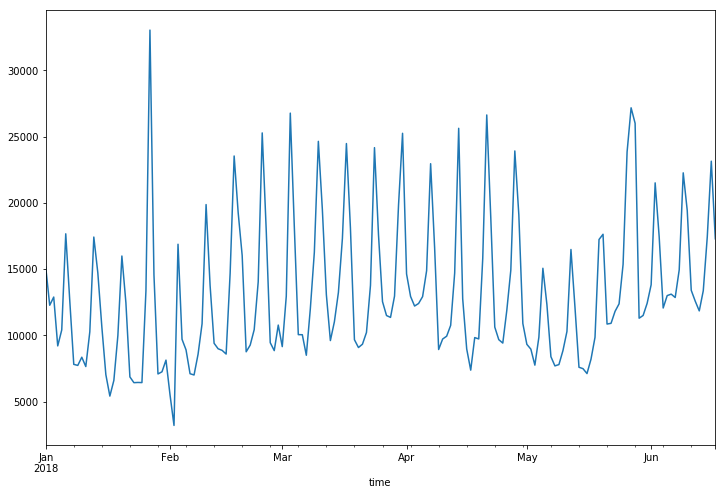

In [15]:
### NIKE 30-min plot
nike['nike_count'].resample('D').sum().plot(figsize=(12,8))

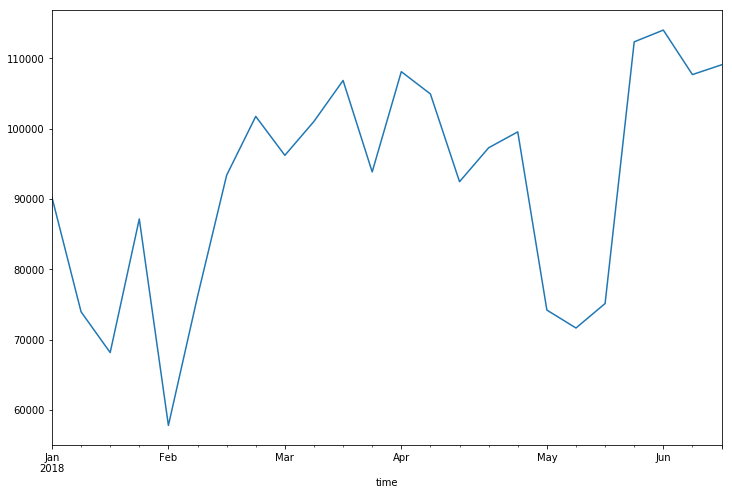

In [16]:
### NIKE weekly plot
nike['nike_count'].resample('W').sum().plot(figsize=(12,8))

# June 6th on the map

In [17]:
import folium
from folium import plugins
from folium.plugins import MarkerCluster

In [18]:
loc = pd.read_csv('ua_nike_0.2_1.csv')
loc.drop(['ua_ID','ua_fileid','nike_ID','nike_fileid','timezone.1'], axis=1, inplace=True)
loc.head()

,ua_new,ua_latitude,ua_longitude,timezone,nike_new,nike_latitude,nike_longitude
0,1,30.37425,-87.67827,America/Chicago,1,30.37657,-87.67756
1,2,32.54514,-117.04300,America/Los_Angeles,2,32.54407,-117.03850
2,3,33.92527,-116.81070,America/Los_Angeles,3,33.92674,-116.81320
3,4,37.02212,-121.56100,America/Los_Angeles,4,37.02078,-121.56460
4,5,34.21361,-119.05880,America/Los_Angeles,5,34.21603,-119.05710


In [19]:
UAA = (39.2752, -76.5913)
# create empty map zoomed in on UAA Headquater
map0 = folium.Map(location=UAA, zoom_start=6)
# add a marker and circle for every record in the filtered data, use a clustered view
for each in loc.iterrows():
    folium.Marker(
        location = [each[1]['ua_latitude'],each[1]['ua_longitude']],popup='Under Armour',icon=folium.Icon(color='green', icon='cloud', angle=0, prefix='fa')).add_to(map0)
for each in loc.iterrows():
    folium.Marker(
        location = [each[1]['nike_latitude'],each[1]['nike_longitude']],popup='Nike',icon=folium.Icon(color='red', icon='male', angle=0, prefix='fa')).add_to(map0)
###radius is 100m    
for each in loc.iterrows():
    folium.Circle(
        location = [each[1]['ua_latitude'],each[1]['ua_longitude']],
        radius=100,
        color='crimson',
        fill=True,
        fill_color='crimson').add_to(map0)
for each in loc.iterrows():
    folium.Circle(
        location = [each[1]['nike_latitude'],each[1]['nike_longitude']],
        radius=100,
        color='crimson',
        fill=True,
        fill_color='crimson').add_to(map0)

In [20]:
### Use cluster
marker_cluster = MarkerCluster().add_to(map0)
# add a marker for every record in the filtered data, use a clustered view
for each in ua['2018-06-06'].iterrows():
    folium.Marker(
        location = [each[1]['deviceLatitude'],each[1]['deviceLongitude']]).add_to(marker_cluster)
for each in nike['2018-06-06'].iterrows():
    folium.Marker(
        location = [each[1]['deviceLatitude'],each[1]['deviceLongitude']]).add_to(marker_cluster)

In [21]:
map0.save('map0606.html')

# Heatmap 

In [22]:
UAA = (39.2752, -76.5913)
# create empty map zoomed in on UAA Headquater
map1 = folium.Map(location=UAA, zoom_start=6)
# add a marker and circle for every record in the filtered data, use a clustered view
for each in loc.iterrows():
    folium.Marker(
        location = [each[1]['ua_latitude'],each[1]['ua_longitude']],popup='Under Armour',icon=folium.Icon(color='green', icon='cloud', angle=0, prefix='fa')).add_to(map1)
for each in loc.iterrows():
    folium.Marker(
        location = [each[1]['nike_latitude'],each[1]['nike_longitude']],popup='Nike',icon=folium.Icon(color='red', icon='male', angle=0, prefix='fa')).add_to(map1)
###radius is 100m    
for each in loc.iterrows():
    folium.Circle(
        location = [each[1]['ua_latitude'],each[1]['ua_longitude']],
        radius=100,
        color='crimson',
        fill=True,
        fill_color='crimson').add_to(map1)
for each in loc.iterrows():
    folium.Circle(
        location = [each[1]['nike_latitude'],each[1]['nike_longitude']],
        radius=100,
        color='crimson',
        fill=True,
        fill_color='crimson').add_to(map1)

In [23]:
ua1 = ua['2018-05'].reset_index()
nike1 = nike['2018-05'].reset_index()

ua1['day']=ua1.time.dt.day
nike1['day']=nike1.time.dt.day

In [24]:
ua1.head()

,time,UTCtimestamp,advertisingID,deviceLatitude,deviceLongitude,id,ua_count,day
0,2018-05-01 00:05:11.000,1525147511000,0257CD35-CB41-414E-B67F-886FC94D4CE2,41.89335,-87.62473,19,1,1
1,2018-05-01 00:13:23.389,1525148003389,813F50F9-C7E6-40D4-8BD5-7061DFD0CCA7,41.89291,-87.62370,19,1,1
2,2018-05-01 00:26:16.654,1525148776654,8384D0C6-7203-44D4-83E6-5801C3AFD05F,41.89345,-87.62428,19,1,1
3,2018-05-01 00:41:17.600,1525149677600,F1A1983C-3253-4D47-A27D-A5EE5CA052F0,41.89234,-87.62420,19,1,1
4,2018-05-01 00:42:02.965,1525149722965,4F14DB7F-031B-44B5-A2C2-520BF433FA3F,41.89191,-87.62411,19,1,1


In [25]:
nike1.head()

,time,UTCtimestamp,advertisingID,deviceLatitude,deviceLongitude,id,nike_count,day
0,2018-05-01 00:00:34.705,1525147234705,A2DD73F4-6F8C-46AD-9462-3ED61CC60B9A,33.75201,-78.96067,42,1,1
1,2018-05-01 00:39:11.645,1525149551645,AC3B92B8-E798-4F92-9A04-6B466C9CE904,32.96412,-97.04437,45,1,1
2,2018-05-01 00:28:58.117,1525148938117,1E5C3521-0915-4890-953D-78AA37668B7E,37.02075,-121.56560,4,1,1
3,2018-05-01 00:05:04.629,1525147504629,0257CD35-CB41-414E-B67F-886FC94D4CE2,41.89384,-87.62459,19,1,1
4,2018-05-01 00:04:56.823,1525147496823,0257CD35-CB41-414E-B67F-886FC94D4CE2,41.89412,-87.62463,19,1,1


In [26]:
heat_ua1 = ua1[['deviceLatitude', 'deviceLongitude','day']]
heat_nike1 = nike1[['deviceLatitude', 'deviceLongitude','day']]

print(heat_ua1.shape)
print(heat_nike1.shape)

(473625, 3)
(383592, 3)


In [27]:
heat_ua_nike = pd.concat([heat_ua1,heat_nike1])
heat_ua_nike.shape

(857217, 3)

In [28]:
heat_data = [[[row['deviceLatitude'], row['deviceLongitude']] for index, row in heat_ua_nike[heat_ua_nike['day'] == i].iterrows()] for i in range(1,32)]
len(heat_data)

31

In [29]:
from datetime import timedelta
time_index = [
    (datetime(2018,5,1) + k * timedelta(days=1)).strftime('%Y-%m-%d') for k in range(0,31)
]

In [30]:
tshm = plugins.HeatMapWithTime(heat_data, auto_play=False, max_opacity=0.8, index=time_index)
tshm.add_to(map1) #create a heatmap with time

In [31]:
map1.save('heatmap_May.html')

# Plots of UA and Nike together

In [32]:
uacd=ua['ua_count'].resample('D').sum()
nikecd=nike['nike_count'].resample('D').sum()
ua_nike_countd = pd.concat([uacd, nikecd], axis=1)
ua_nike_countd.shape

(168, 2)

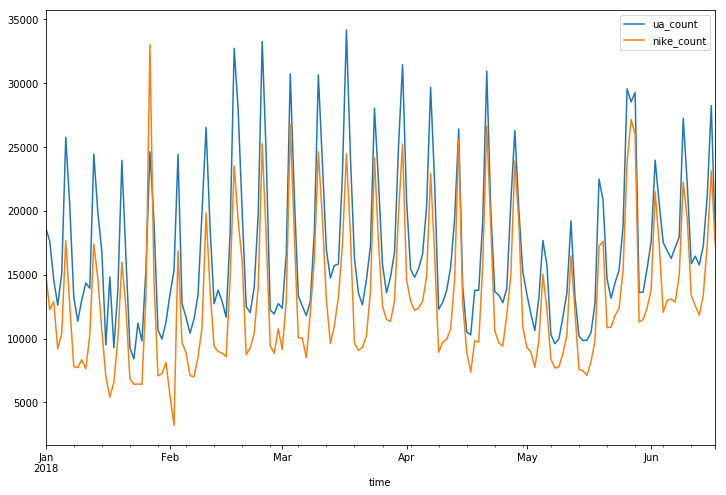

In [33]:
ua_nike_countd.plot(figsize=(12,8))

In [34]:
uacw = ua['ua_count'].resample('W').sum()
nikecw = nike['nike_count'].resample('W').sum()
ua_nike_countw = pd.concat([uacw, nikecw], axis=1)
ua_nike_countw.shape

(24, 2)

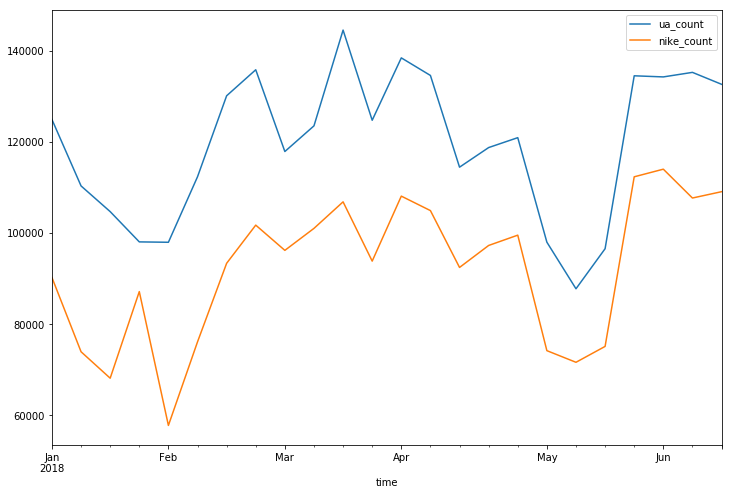

In [35]:
ua_nike_countw.plot(figsize=(12,8))

In [36]:
uac = ua['ua_count'].resample('30T').sum()
nikec = nike['nike_count'].resample('30T').sum()
ua_nike_count = pd.concat([uac, nikec], axis=1)
ua_nike_count.shape

(8056, 2)

In [37]:
ua_nike_count.head()

,ua_count,nike_count
time,,
2018-01-01 00:00:00,75,110
2018-01-01 00:30:00,89,62
2018-01-01 01:00:00,100,39
2018-01-01 01:30:00,107,81
2018-01-01 02:00:00,131,98


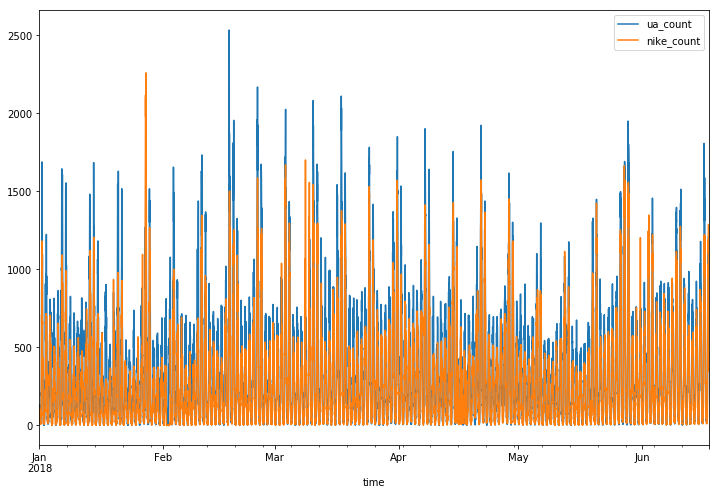

In [38]:
ua_nike_count.plot(figsize=(12,8))

### Check for missing values

In [39]:
ua_nike_count.dropna().shape

(8056, 2)

In [40]:
ua_nike_count = ua_nike_count.dropna()

In [41]:
ua_nike_count.tail()

,ua_count,nike_count
time,,
2018-06-17 17:30:00,1015,940
2018-06-17 18:00:00,874,874
2018-06-17 18:30:00,724,663
2018-06-17 19:00:00,740,436
2018-06-17 19:30:00,382,346


# Stock & Twitter Data

In [42]:
### load UA 30-min stock and twitter data
uatwt_stk = pd.read_csv('UA_Tweet.csv')
uatwt_stk.head()

,Date,Lst Trd/Lst Px,Volume,Twttr Sent,Twttr Sent(Real time),Twttr Pub Cnt,Twttr Neut Sent
0,7/11/18 19:30:00,NaN,NaN,NaN,NaN,1.0,1.0
1,7/11/18 19:00:00,22.24,200,22.24,NaN,NaN,NaN
2,7/11/18 18:30:00,22.24,300,22.24,NaN,3.0,3.0
3,7/11/18 18:00:00,NaN,NaN,NaN,0.0000,2.0,2.0
4,7/11/18 17:30:00,NaN,NaN,NaN,0.1068,2.0,NaN


In [43]:
uatwt_stk['Date'] = pd.to_datetime(uatwt_stk['Date'])
uatwt_stk = uatwt_stk.set_index('Date')
uatwt_stk.head()

,Lst Trd/Lst Px,Volume,Twttr Sent,Twttr Sent(Real time),Twttr Pub Cnt,Twttr Neut Sent
Date,,,,,,
2018-07-11 19:30:00,NaN,NaN,NaN,NaN,1.0,1.0
2018-07-11 19:00:00,22.24,200,22.24,NaN,NaN,NaN
2018-07-11 18:30:00,22.24,300,22.24,NaN,3.0,3.0
2018-07-11 18:00:00,NaN,NaN,NaN,0.0000,2.0,2.0
2018-07-11 17:30:00,NaN,NaN,NaN,0.1068,2.0,NaN


In [44]:
### range from 01/01/2018 to 06/17/2018
uatwt_stk=uatwt_stk.sort_index()['2018-01-01':'2018-06-17']

In [45]:
uatwt_stk.tail()

,Lst Trd/Lst Px,Volume,Twttr Sent,Twttr Sent(Real time),Twttr Pub Cnt,Twttr Neut Sent
Date,,,,,,
2018-06-15 16:30:00,NaN,NaN,NaN,NaN,2.0,1.0
2018-06-15 17:00:00,23.15,500,23.15,NaN,1.0,1.0
2018-06-15 18:00:00,NaN,NaN,NaN,-0.0319,4.0,2.0
2018-06-15 18:30:00,23.21,0,23.21,0.0000,3.0,3.0
2018-06-15 19:00:00,NaN,NaN,NaN,NaN,1.0,1.0


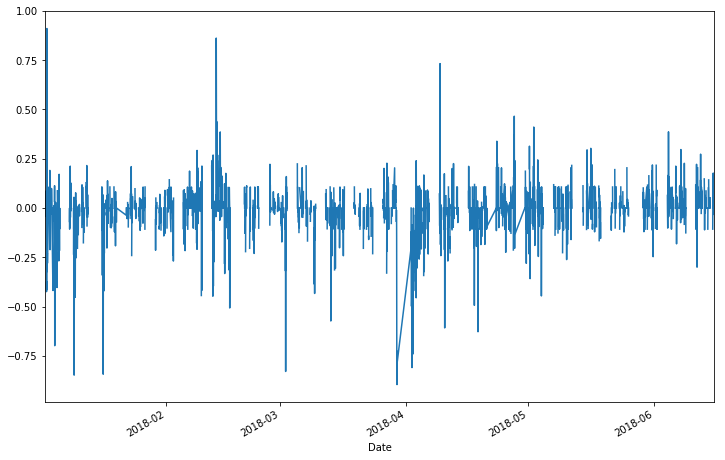

In [46]:
### UA tweet sentiment plot
uatwt_stk['Twttr Sent(Real time)'].plot(figsize=(12,8))

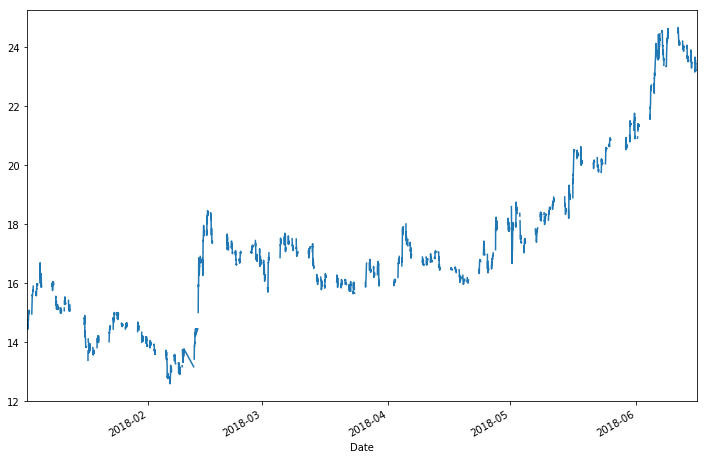

In [47]:
### UA stock price plot
uatwt_stk['Lst Trd/Lst Px'].plot(figsize=(12,8))

In [48]:
uatwt_stk.shape

(3460, 6)

In [49]:
### load Nike 30-min stock and twitter data
niketwt_stk = pd.read_csv('NIKE_Tweet.csv')
niketwt_stk.head()

,Date,Lst Trd/Lst Px,Volume,Twttr Sent,Twttr Sent(Real time),Twttr Pub Cnt,Twttr Neut Sent
0,7/11/18 19:30:00,NaN,NaN,NaN,NaN,5.0,4.0
1,7/11/18 19:00:00,77.50,200,77.50,NaN,8.0,8.0
2,7/11/18 18:30:00,77.36,68208,77.36,NaN,2.0,2.0
3,7/11/18 18:00:00,NaN,NaN,NaN,NaN,1.0,1.0
4,7/11/18 17:30:00,NaN,NaN,NaN,NaN,1.0,1.0


In [50]:
niketwt_stk['Date']=pd.to_datetime(niketwt_stk['Date'])

niketwt_stk=niketwt_stk.set_index('Date')

niketwt_stk=niketwt_stk.sort_index()['2018-01-01':'2018-06-17']

niketwt_stk.head()

,Lst Trd/Lst Px,Volume,Twttr Sent,Twttr Sent(Real time),Twttr Pub Cnt,Twttr Neut Sent
Date,,,,,,
2018-01-02 04:00:00,NaN,NaN,NaN,NaN,5.0,5.0
2018-01-02 04:30:00,NaN,NaN,NaN,NaN,2.0,2.0
2018-01-02 05:00:00,62.36,641,62.36,NaN,4.0,4.0
2018-01-02 05:30:00,NaN,NaN,NaN,NaN,1.0,1.0
2018-01-02 06:00:00,NaN,NaN,NaN,NaN,13.0,13.0


In [51]:
niketwt_stk.tail()

,Lst Trd/Lst Px,Volume,Twttr Sent,Twttr Sent(Real time),Twttr Pub Cnt,Twttr Neut Sent
Date,,,,,,
2018-06-15 17:30:00,75.99,600,75.99,NaN,6.0,6.0
2018-06-15 18:00:00,NaN,NaN,NaN,0.0899,7.0,4.0
2018-06-15 18:30:00,75.84,0,75.84,0.0000,2.0,2.0
2018-06-15 19:00:00,NaN,NaN,NaN,-0.0549,6.0,2.0
2018-06-15 19:30:00,75.84,300,75.84,0.0000,8.0,8.0


In [52]:
niketwt_stk.shape

(3624, 6)

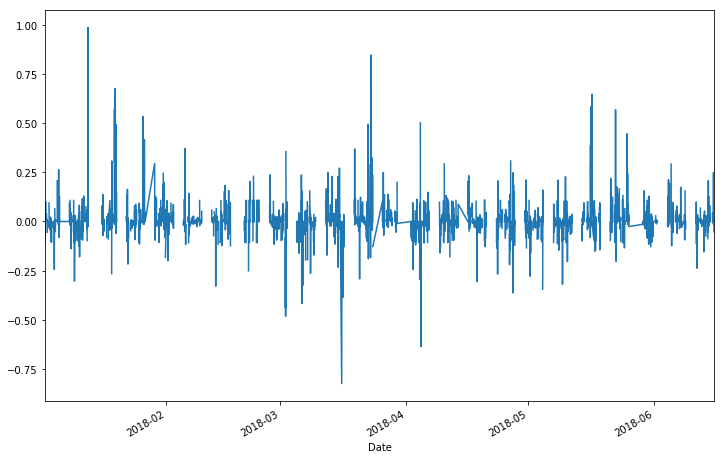

In [53]:
### Nike tweet sentiment plot
niketwt_stk['Twttr Sent(Real time)'].plot(figsize=(12,8))

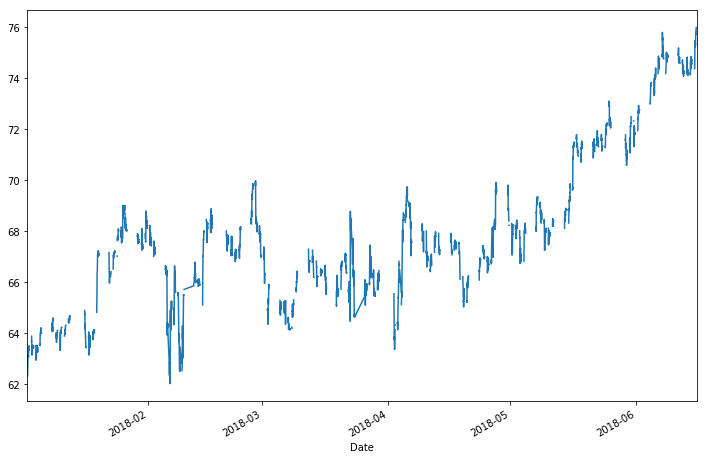

In [54]:
### Nike stock price plot
niketwt_stk['Lst Trd/Lst Px'].plot(figsize=(12,8))

In [55]:
### remane
uatwt_stk['ua_tweet']=uatwt_stk['Twttr Sent(Real time)']
niketwt_stk['nike_tweet']=niketwt_stk['Twttr Sent(Real time)']
uatwt_stk['ua_price']=uatwt_stk['Lst Trd/Lst Px']
niketwt_stk['nike_price']=niketwt_stk['Lst Trd/Lst Px']
uatwt_stk['ua_stkv']=uatwt_stk['Volume']
niketwt_stk['nike_stkv']=niketwt_stk['Volume']
uatwt_stk['ua_twtcount']=uatwt_stk['Twttr Pub Cnt']
niketwt_stk['nike_twtcount']=niketwt_stk['Twttr Pub Cnt']

## Putting all features (customer count, stock price and tweet sentiment data) together

In [56]:
alldata= pd.concat([ua_nike_count, 
                  uatwt_stk['ua_price'], niketwt_stk['nike_price'],
                  uatwt_stk['ua_stkv'],niketwt_stk['nike_stkv'],
                  uatwt_stk['ua_tweet'],niketwt_stk['nike_tweet'],
                  uatwt_stk['ua_twtcount'],niketwt_stk['nike_twtcount']
                 ], axis=1)
alldata.shape

(8056, 10)

In [57]:
alldata=alldata['2018-01-02 9:00':'2018-06-15 16:00']

In [58]:
alldata['count_ratio']=alldata['ua_count']/alldata['nike_count']
alldata['price_ratio']=alldata['ua_price']/alldata['nike_price']
alldata['tweet_diff']=alldata['ua_tweet']-alldata['nike_tweet']
alldata.head()
print(alldata.shape)

(7887, 13)


In [59]:
### adjust units

def f(x):
    if('k' in str(x)):
        return float(x[:-1]) * 1000
    return x

alldata['ua_stkv'] = list(map(f,alldata['ua_stkv']))
alldata['nike_stkv']=list(map(f,alldata['nike_stkv']))

In [60]:
### adjust units

def f(x):
    if('M' in str(x)):
        return float(x[:-1]) * 1000000
    return x

alldata['ua_stkv'] = list(map(f,alldata['ua_stkv']))
alldata['nike_stkv']=list(map(f,alldata['nike_stkv']))

In [61]:
alldata[ alldata['count_ratio'] <= 50].shape

(7831, 13)

In [62]:
### exclude abnormal ratio data

alldata=alldata[ alldata['count_ratio'] <= 50]
alldata.head()

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,count_ratio,price_ratio,tweet_diff
2018-01-02 09:00:00,100,125,14.580,62.80,4100,3483,0.0000,NaN,2.0,6.0,0.800000,0.232166,NaN
2018-01-02 09:30:00,97,91,14.500,63.02,1.052e+06,764981,NaN,NaN,4.0,8.0,1.065934,0.230086,NaN
2018-01-02 10:00:00,289,109,14.520,63.15,654032,412408,-0.0399,0.0988,4.0,6.0,2.651376,0.229929,-0.1387
2018-01-02 10:30:00,200,226,14.545,63.15,610862,354213,0.0000,0.0000,1.0,5.0,0.884956,0.230325,0.0000
2018-01-02 11:00:00,251,142,14.640,63.11,379924,273355,-0.0261,0.0224,16.0,9.0,1.767606,0.231976,-0.0485


In [63]:
### export data

alldata.to_csv("alldata.csv",sep=',')

# Reload the data and draw the aggregated time series plots

In [64]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt

In [65]:
alldata1=pd.read_csv('alldata.csv')
alldata1=alldata1.rename(columns={'Unnamed: 0':'time'})
alldata1['time']=pd.DatetimeIndex(pd.to_datetime(alldata1['time']))
alldata1=alldata1.set_index('time')
alldata1.head()

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,count_ratio,price_ratio,tweet_diff
time,,,,,,,,,,,,,
2018-01-02 09:00:00,100,125,14.580,62.80,4100.0,3483.0,0.0000,NaN,2.0,6.0,0.800000,0.232166,NaN
2018-01-02 09:30:00,97,91,14.500,63.02,1052000.0,764981.0,NaN,NaN,4.0,8.0,1.065934,0.230086,NaN
2018-01-02 10:00:00,289,109,14.520,63.15,654032.0,412408.0,-0.0399,0.0988,4.0,6.0,2.651376,0.229929,-0.1387
2018-01-02 10:30:00,200,226,14.545,63.15,610862.0,354213.0,0.0000,0.0000,1.0,5.0,0.884956,0.230325,0.0000
2018-01-02 11:00:00,251,142,14.640,63.11,379924.0,273355.0,-0.0261,0.0224,16.0,9.0,1.767606,0.231976,-0.0485


In [66]:
total.count_ratio.plot(figsize=(12,8))

In [67]:
alldata1.shape

(7831, 13)

Text(0, 0.5, 'ua tweet - nike tweet')

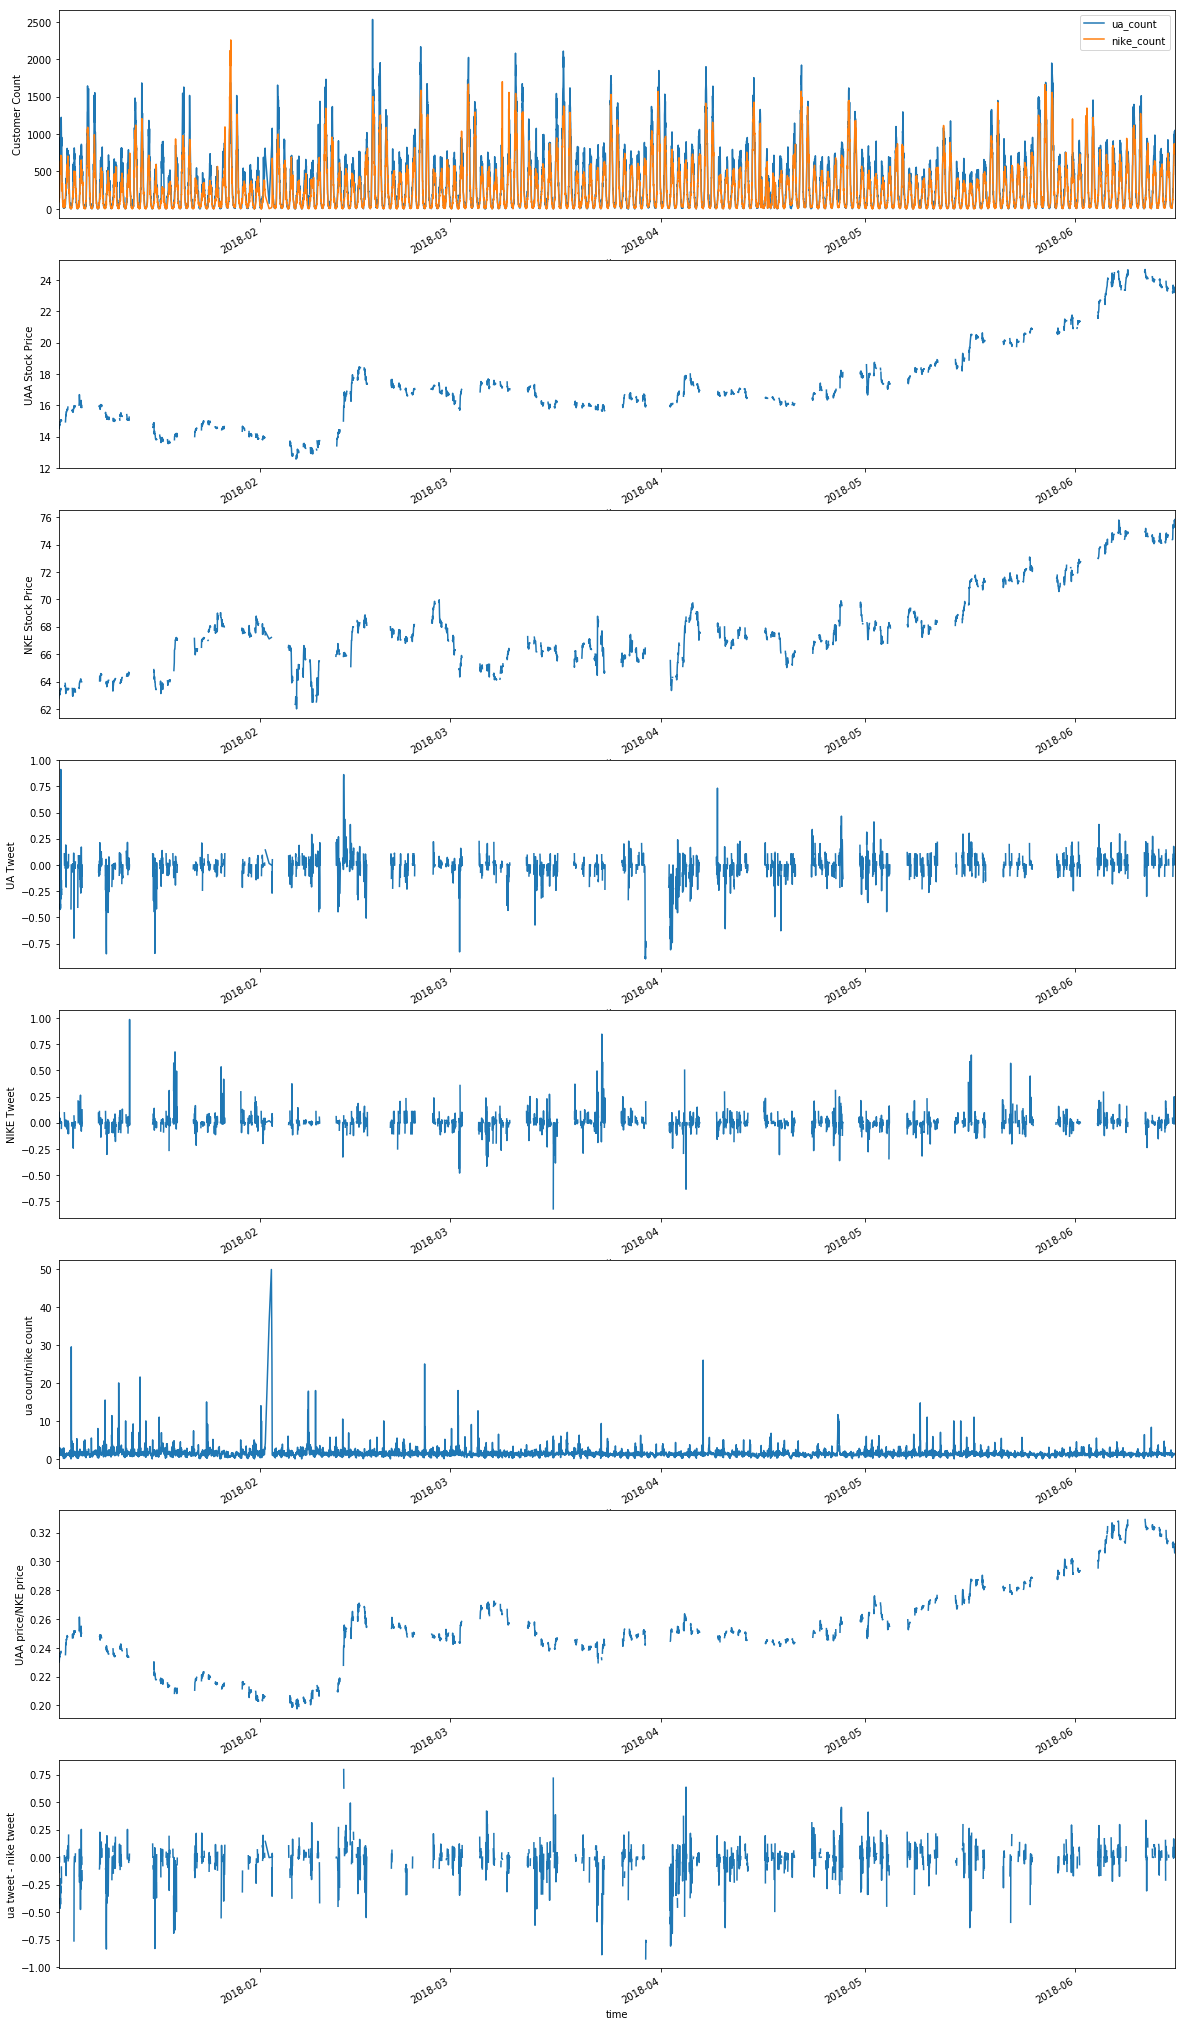

In [68]:
figure=plt.figure(figsize=(20,40))
axes1=figure.add_subplot(8,1,1)
alldata1[['ua_count','nike_count']].plot(ax=axes1)

axes2=figure.add_subplot(8,1,2)
alldata1['ua_price'].plot(ax=axes2)

axes3=figure.add_subplot(8,1,3)
alldata1['nike_price'].plot(ax=axes3)

axes4=figure.add_subplot(8,1,4)
alldata1['ua_tweet'].plot(ax=axes4)

axes5=figure.add_subplot(8,1,5)
alldata1['nike_tweet'].plot(ax=axes5)

axes6=figure.add_subplot(8,1,6)
alldata1['count_ratio'].plot(ax=axes6)

axes7=figure.add_subplot(8,1,7)
alldata1['price_ratio'].plot(ax=axes7)

axes8=figure.add_subplot(8,1,8)
alldata1['tweet_diff'].plot(ax=axes8)

axes1.set_ylabel('Customer Count')
axes2.set_ylabel('UAA Stock Price')
axes3.set_ylabel('NKE Stock Price')
axes6.set_ylabel('ua count/nike count')
axes7.set_ylabel('UAA price/NKE price')
axes4.set_ylabel('UA Tweet')
axes5.set_ylabel('NIKE Tweet')
axes8.set_ylabel('ua tweet - nike tweet')

Text(0, 0.5, 'NIKE Tweet')

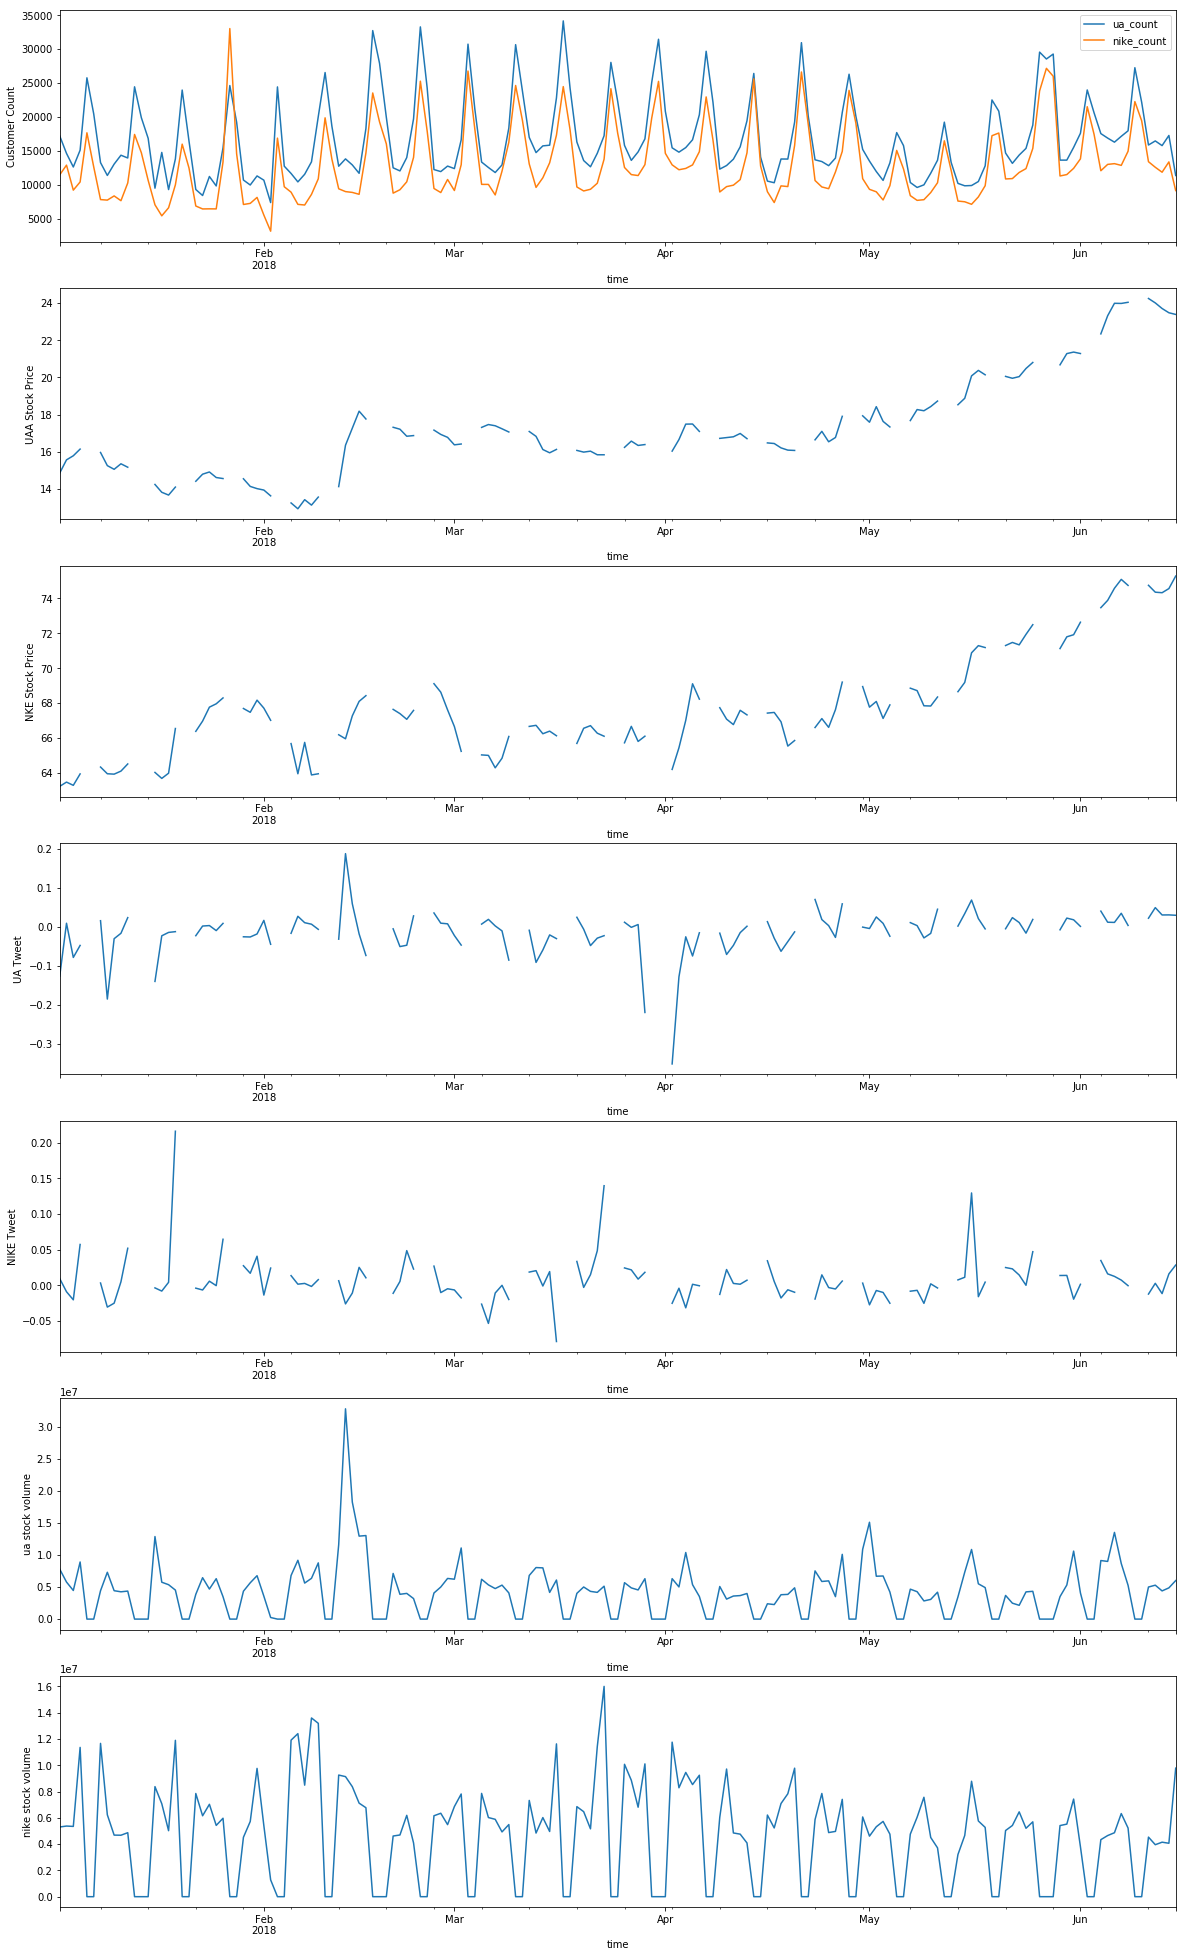

In [69]:
figure=plt.figure(figsize=(20,40))
axes1=figure.add_subplot(8,1,1)
alldata1[['ua_count','nike_count']].resample('D').sum().plot(ax=axes1)

axes2=figure.add_subplot(8,1,2)
alldata1['ua_price'].resample('D').mean().plot(ax=axes2)

axes3=figure.add_subplot(8,1,3)
alldata1['nike_price'].resample('D').mean().plot(ax=axes3)

axes4=figure.add_subplot(8,1,4)
alldata1['ua_tweet'].resample('D').mean().plot(ax=axes4)

axes5=figure.add_subplot(8,1,5)
alldata1['nike_tweet'].resample('D').mean().plot(ax=axes5)


axes6=figure.add_subplot(8,1,6)
alldata1['ua_stkv'].resample('D').sum().plot(ax=axes6)

axes7=figure.add_subplot(8,1,7)
alldata1['nike_stkv'].resample('D').sum().plot(ax=axes7)


axes1.set_ylabel('Customer Count')
axes2.set_ylabel('UAA Stock Price')
axes3.set_ylabel('NKE Stock Price')
axes6.set_ylabel('ua stock volume')
axes7.set_ylabel('nike stock volume')
axes4.set_ylabel('UA Tweet')
axes5.set_ylabel('NIKE Tweet')
# axes8.set_ylabel('UA tweet-NiKE tweet')